<a href="https://colab.research.google.com/github/aronsinkie/NIDS/blob/master/NLP_Gurage_spellcheker_and_corrrector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ትግበራዎች

## ጥቅል

In [ ]:
pip install colorama

# ቅጥያን ማስዎገድ

In [ ]:
def remove_amharic_noun_affixes(word):
    for prefix in amharic_noun_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_noun_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
    return word#.rstrip(word[-1])

In [ ]:
def remove_amharic_verb_affixes(word):
    for prefix in amharic_verb_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_verb_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
    return word#.rstrip(word[-1])


In [ ]:
def remove_amharic_adj_affixes(word):
    for prefix in amharic_adj_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_adj_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
    return word#.rstrip(word[-1])

# ተነባቢ ዐናባቢ

In [ ]:
RIBI = {
'ሐ':'ሕአ',
'ሑ':'ሕኡ',
'ሒ':'ሕኢ',
'ሓ':'ሕኣ',
'ሔ':'ሕኤ',
'ሕ':'ሕ',
'ሖ':'ሕኦ',
'𞟨':'𞟫አ',
'ሑ':'ሕኡ',
'𞟩':'𞟫ኢ',
'ሗ':'𞟫ኣ',
'𞟪':'𞟫ኤ',
'𞟫':'𞟫',
'ሖ':'ሕኦ',
'𞟠':'𞟥አ',
'𞟡':'𞟥ኡ',
'𞟢':'𞟥ኢ',
'𞟣':'𞟥ኣ',
'𞟤':'𞟥ኤ',
'𞟥':'𞟥',
'𞟦':'𞟥ኦ',
'ለ':'ልአ',
'ሉ':'ልኡ',
'ሊ':'ልኢ',
'ላ':'ልኣ',
'ሌ':'ልኤ',
'ል':'ል',
'ሎ':'ልኦ',
'መ':'ምአ',
'ሙ':'ምኡ',
'ሚ':'ምኢ',
'ማ':'ምኣ',
'ሜ':'ምኤ',
'ም':'ም',
'ሞ':'ምኦ',
'ᎀ':'ᎃአ',
'ሙ':'ምኡ',
'𞟭':'ᎃኢ',
'ሟ':'ᎃኣ',
'𞟮':'ᎃኤ',
'ᎃ':'ᎃ',
'ሞ':'ምኦ',
'ረ':'ርአ',
'ሩ':'ርኡ',
'ሪ':'ርኢ',
'ራ':'ርኣ',
'ሬ':'ርኤ',
'ር':'ር',
'ሮ':'ርኦ',
'ሰ':'ስአ',
'ሱ':'ስኡ',
'ሲ':'ስኢ',
'ሳ':'ስኣ',
'ሴ':'ስኤ',
'ስ':'ስ',
'ሶ':'ስኦ',
'ሸ':'ሽአ',
'ሹ':'ሽኡ',
'ሺ':'ሽኢ',
'ሻ':'ሽኣ',
'ሼ':'ሽኤ',
'ሽ':'ሽ',
'ሾ':'ሽኦ',
'ቀ':'ቅአ',
'ቁ':'ቅኡ',
'ቂ':'ቅኢ',
'ቃ':'ቅኣ',
'ቄ':'ቅኤ',
'ቅ':'ቅ',
'ቆ':'ቅኦ',
'ቈ':'ቅአ',
'ቁ':'ቅኡ',
'𞟰':'𞟲ኢ',
'ቋ':'𞟲ኣ',
'𞟱':'𞟲ኤ',
'𞟲':'𞟲',
'ቆ':'ቅኦ',
'ቐ':'ቕአ',
'ቑ':'ቕኡ',
'ቒ':'ቕኢ',
'ቓ':'ቕኣ',
'ቔ':'ቕኤ',
'ቕ':'ቕ',
'ቖ':'ቕኦ',
'በ':'ብአ',
'ቡ':'ብኡ',
'ቢ':'ብኢ',
'ባ':'ብኣ',
'ቤ':'ብኤ',
'ብ':'ብ',
'ቦ':'ብኦ',
'ᎄ':'ᎇአ',
'ቡ':'ብኡ',
'𞟳':'𞟳ኢ',
'ቧ':'ᎇኣ',
'𞟴':'ᎇኤ',
'ᎇ':'ᎇ',
'ቦ':'ብኦ',
'ተ':'ትአ',
'ቱ':'ትኡ',
'ቲ':'ትኢ',
'ታ':'ትኣ',
'ቴ':'ትኤ',
'ት':'ት',
'ቶ':'ትኦ',
'ቸ':'ችአ',
'ቹ':'ችኡ',
'ቺ':'ችኢ',
'ቻ':'ችኣ',
'ቼ':'ችኤ',
'ች':'ች',
'ቾ':'ችኦ',
'ነ':'ንአ',
'ኑ':'ንኡ',
'ኒ':'ንኢ',
'ና':'ንኣ',
'ኔ':'ንኤ',
'ን':'ን',
'ኖ':'ንኦ',
'ኘ':'ኝአ',
'ኙ':'ኝኡ',
'ኚ':'ኝኢ',
'ኛ':'ኝኣ',
'ኜ':'ኝኤ',
'ኝ':'ኝ',
'ኞ':'ኝኦ',
'አ':'አ',
'ኡ':'ኡ',
'ኢ':'ኢ',
'ኣ':'ኣ',
'ኤ':'ኤ',
'እ':'እ',
'ኦ':'ኦ',
'ከ':'ክአ',
'ኩ':'ክኡ',
'ኪ':'ክኢ',
'ካ':'ክኣ',
'ኬ':'ክኤ',
'ክ':'ክእ',
'ኮ':'ክኦ',
'ኰ':'𞟷አ',
'ኩ':'ክኡ',
'𞟵':'𞟷ኢ',
'ኳ':'𞟷ኣ',
'𞟶':'𞟷ኤ',
'𞟷':'𞟷',
'ኮ':'ክኦ',
'ኸ':'ኽአ',
'ኹ':'ኽኡ',
'ኺ':'ኽኢ',
'ኻ':'ኽኣ',
'ኼ':'ኽኤ',
'ኽ':'ኽ',
'ኾ':'ኽኦ',
'ወ':'ውአ',
'ዉ':'ውኡ',
'ዊ':'ውኢ',
'ዋ':'ውኣ',
'ዌ':'ውኤ',
'ው':'ው',
'ዎ':'ውኦ',
'ዐ':'ዕአ',
'ዑ':'ዕኡ',
'ዒ':'ዕኢ',
'ዓ':'ዕኣ',
'ዔ':'ዕኤ',
'ዕ':'ዕ',
'ዖ':'ዕኦ',
'ዘ':'ዝአ',
'ዙ':'ዝኡ',
'ዚ':'ዝኢ',
'ዛ':'ዝኣ',
'ዜ':'ዝኤ',
'ዝ':'ዝ',
'ዞ':'ዝኦ',
'ዠ':'ዥአ',
'ዡ':'ዥኡ',
'ዢ':'ዥኢ',
'ዣ':'ዥኣ',
'ዤ':'ዥኤ',
'ዥ':'ዥእ',
'ዦ':'ዥኦ',
'የ':'ይአ',
'ዩ':'ዩኡ',
'ዪ':'ይኢ',
'ያ':'ይኣ',
'ዬ':'ይኤ',
'ይ':'ይ',
'ዮ':'ይኦ',
'ደ':'ድአ',
'ዱ':'ድኡ',
'ዲ':'ድኢ',
'ዳ':'ድኣ',
'ዴ':'ድኤ',
'ድ':'ድ',
'ዶ':'ድኦ',
'ጀ':'ጅአ',
'ጁ':'ጅኡ',
'ጂ':'ጅኢ',
'ጃ':'ጅኣ',
'ጄ':'ጅኤ',
'ጅ':'ጅ',
'ጂ':'ጅኦ',
'ገ':'ግአ',
'ጉ':'ግኡ',
'ጊ':'ግኢ',
'ጋ':'ግኣ',
'ጌ':'ግኤ',
'ግ':'ግእ',
'ጎ':'ግኦ',
'ጐ':'ግአ',
'ጉ':'ግኡ',
'𞟸':'𞟺ኢ',
'ጓ':'𞟺ኣ',
'𞟹':'𞟺ኤ',
'𞟺':'𞟺',
'ጎ':'ገኦ',
'ጘ':'ጝአ',
'ጙ':'ጝኡ',
'ጚ':'ጝኢ',
'ጛ':'ጝኣ',
'ጜ':'ጝኤ',
'ጝ':'ጝ',
'ጞ':'ጝኦ',
'ጠ':'ጥአ',
'ጡ':'ጥኡ',
'ጢ':'ጥኢ',
'ጣ':'ጥኣ',
'ጤ':'ጥኤ',
'ጥ':'ጥ',
'ጦ':'ጥኦ',
'ጨ':'ጭአ',
'ጩ':'ጭኡ',
'ጪ':'ጭኢ',
'ጫ':'ጭኣ',
'ጬ':'ጭኤ',
'ጭ':'ጭእ',
'ጮ':'ጭኦ',
'ፈ':'ፍአ',
'ፉ':'ፍኡ',
'ፊ':'ፍኢ',
'ፋ':'ፍኣ',
'ፌ':'ፍኤ',
'ፍ':'ፍ',
'ፎ':'ፍኦ',
'ᎈ':'ᎋአ',
'ፉ':'ᎋኡ',
'𞟻':'ᎋኢ',
'ፏ':'ᎋኣ',
'𞟼':'ᎋኤ',
'ᎋ':'ᎋ',
'ፎ':'ፍኦ',
'ፐ':'ፕአ',
'ፑ':'ፕኡ',
'ፒ':'ፕኢ',
'ፓ':'ፕኣ',
'ፔ':'ፕኤ',
'ፕ':'ፕእ',
'ፖ':'ፕኦ',
'ᎌ':'ᎏአ',
'ፑ':'ፕኡ',
'𞟽':'ᎏኢ',
'𞟾':'ᎏኤ',
'ᎏ':'ᎏ',
'ፓ':'ፕኦ',
}

# ዋና ቃል ምስረታ(so_called_steam_word)

In [ ]:
def so_called_steam_noun_word(word):
    for prefix in amharic_noun_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_noun_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
        word = word.replace("-", "")
    return word

In [ ]:
def so_called_steam_verb_word(word):
    for prefix in amharic_verb_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_verb_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
        word = word.replace("-", "")
    return word

In [ ]:
def so_called_steam_adj_word(word):
    for prefix in amharic_adj_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_adj_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
        word = word.replace("-", "")
    return word

# ተነባቢ አናባቢ ትንትና ትግበራ(Erbata_TIGBERA and reverse_Erbata)

In [ ]:
def Erbata_TIGBERA(KAL: str, RIBI: dict) -> str:
    Anababi_Erbata = [RIBI.get(FIDEL, '') for FIDEL in KAL]
    Anababi_Erbata = '-'.join(Anababi_Erbata)
    return Anababi_Erbata
def reverse_Erbata(KAL: str, RIBI: dict) -> str:
    split_words = KAL.split("-")
    new_word = ''
    for split_word in split_words:
        for key, value in RIBI.items():
            if value == split_word:
                new_word += key
                break
        else:
            new_word += split_word
        new_word += '-'
    return new_word.rstrip('-')

# ቃላትን ማርባት

In [ ]:
def add_amharic_noun_affixes(stem_word):
    words_with_affixes = []

    for prefix in amharic_noun_prefixes:
        words_with_affixes.append(prefix + stem_word)

    for suffix in amharic_noun_suffixes:
        words_with_affixes.append(stem_word[:-1] + suffix)

    return words_with_affixes

In [ ]:
def add_amharic_verb_affixes(stem_word):
    words_with_affixes = []

    for prefix in amharic_verb_prefixes:
        words_with_affixes.append(prefix + stem_word)

    for suffix in amharic_verb_suffixes:
        words_with_affixes.append(stem_word[:-1] + suffix)

    return words_with_affixes

In [ ]:
def add_amharic_adj_affixes(stem_word):
    words_with_affixes = []

    for prefix in amharic_adj_prefixes:
        words_with_affixes.append(prefix + stem_word)

    for suffix in amharic_adj_suffixes:
        words_with_affixes.append(stem_word[:-1] + suffix)

    return words_with_affixes

# ሰረዝን ማጥፋት

In [ ]:
def remove_hyphen(word):
    return word.replace("-", "")

# ከዋና ቅል ከረጢት ጋር ማመሳሰል

In [ ]:
def check_string_in_file(file_path, search_string):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if search_string.encode('utf-8') in line.encode('utf-8'):
                    return True
        return False
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return False
    except IOError:
        print(f"Error reading file '{file_path}'.")
        return False

# ከዋና ቃል ቅርብ የሖነውን መፈለግ

In [ ]:
def find_closest_word(root_word, misspelled_word):
    with open(root_word, "r", encoding="utf-8") as file:
        root_words = [line.strip() for line in file]

    closest_word = difflib.get_close_matches(misspelled_word, root_words, n=1)
    if closest_word:
        return closest_word[0]
    else:
        return None

# family and order

In [ ]:
def family(char1, char2):
    char1 = Erbata_TIGBERA(char1, RIBI)
    char2 = Erbata_TIGBERA(char2, RIBI)
    if len(char1) <  2 and len(char2)< 2:
      return 1
    elif char1[0] == char2[0]:
        return 1
    elif len(char1) < 1 or len(char2) < 1:
      return 0
    return 0
def order(char1, char2):

        char1 = Erbata_TIGBERA(char1, RIBI)
        char2 = Erbata_TIGBERA(char2, RIBI)
        if len(char1) >= 2 and len(char2) >= 2:
          if char1[1] == char2[1]:
            return 1
        if len(char1) < 2 and len(char2) >= 2:
          if char1[0] == char2[1]:
            return 1
        if len(char1) >=  2 and len(char2)< 2:
          if char1[1] == char2[0]:
            return 1
        return 0

# ተመሳሳይ ሖሒያትን መፈለግ

In [ ]:
def match_words(word1, word2):
    matched_chars = ""
    unmatched_chars1_before = ""
    unmatched_chars1_after = ""
    unmatched_chars2_before = ""
    unmatched_chars2_after = ""

    if word1 is None or word2 is None:
        return matched_chars, unmatched_chars1_before, unmatched_chars1_after, unmatched_chars2_before, unmatched_chars2_after

    # Convert the words into lists of characters
    word1_list = list(word1)
    word2_list = list(word2)

    # Iterate over each character in word1
    for char1 in word1_list:
        # Iterate over each character in word2
        for char2 in word2_list:
            if char1 == char2:
                matched_chars += char1

    if matched_chars:
        # Find the index of the first matched character in word1
        first_match_index = word1.index(matched_chars[0])

        # Extract the characters before and after the matched characters for word1
        unmatched_chars1_before = word1[:first_match_index]
        unmatched_chars1_after = word1[first_match_index + len(matched_chars):]

        # Find the index of the first matched character in word2
        first_match_index = word2.index(matched_chars[0])

        # Extract the characters before and after the matched characters for word2
        unmatched_chars2_before = word2[:first_match_index]
        unmatched_chars2_after = word2[first_match_index + len(matched_chars):]
    else:
        unmatched_chars1_after = word1
        unmatched_chars2_after = word2

    return (
        matched_chars,
        unmatched_chars1_before,
        unmatched_chars1_after,
        unmatched_chars2_before,
        unmatched_chars2_after
    )


# ቃሉ ከርቢ ቃላት ጋር ያለው ርቀት

In [ ]:

def compare_words(word1, word2):
    matched, unmatched1_before, unmatched1_after, unmatched_chars2_before, unmatched_chars2_after = match_words(word1, word2)
    # Step 3: Computing average distance between unmatched blocks
    total_distance = 0.0
    comparisons = 0
    unmatched_dif2=0
    unmatched_dif1=0
    XX=0
    if unmatched1_after or unmatched_chars2_after:
        min_length2 = min(len(unmatched1_after), len(unmatched_chars2_after))
        max_length2 = max(len(unmatched1_after), len(unmatched_chars2_after))
        unmatched_dif2 = max_length2 - min_length2
        for i in range(min_length2):
          for j in range(min_length2):
                char1 = unmatched1_after[i]
                char2 = unmatched_chars2_after[j]

                comparisons += 1
                if char1 =='' :
                  total_distance += 0.1

                elif char2 =='':
                  total_distance += 0.1

                elif family(char1, char2) == 1 and order(char1, char2) == 1:
                  total_distance += 1

                elif family(char1, char2) == 1 and order(char1, char2) != 1:
                  total_distance += 0.7

                elif family(char1, char2) != 1 and order(char1, char2) == 1:
                  total_distance += 0.5

                elif family(char1, char2) != 1 and order(char1, char2) != 1:
                    total_distance += 0.3

    if unmatched1_before or unmatched_chars2_before:
        min_length1 = min(len(unmatched1_before), len(unmatched_chars2_before))
        max_length1 = max(len(unmatched1_before), len(unmatched_chars2_before))
        unmatched_dif1 = max_length1 - min_length1
        for i in range(min_length1):

          for j in range(min_length1):
                char1 = unmatched1_before[i]
                char2 = unmatched_chars2_before[j]
                comparisons += 1
                if char1 =='' :
                  total_distance += 0.1
                elif char2 =='':
                  total_distance += 0.1

                elif family(char1, char2) == 1 and order(char1, char2) == 1:
                  total_distance += 1
                elif family(char1, char2) == 1 and order(char1, char2) != 1:
                  total_distance += 0.7
                elif family(char1, char2) != 1 and order(char1, char2) == 1:
                  total_distance += 0.5
                elif family(char1, char2) != 1 and order(char1, char2) != 1:
                    total_distance += 0.3
    total_distance += len(matched)
    XX=(unmatched_dif1 + unmatched_dif2)
    yy=(XX/10)
    total_distance =yy+total_distance
    total_distance = float("{:.1f}".format(total_distance))
    comparisons += unmatched_dif1 + unmatched_dif2+len(matched)
    average_distance = total_distance / int(comparisons)
    average_distance = "\033[91m" + str(average_distance) + "\033[0m"  # Set the value of word1 to red color
    return matched, unmatched1_before, unmatched_chars2_before,unmatched1_after, unmatched_chars2_after, total_distance, comparisons, average_distance



# prefix and suffix

In [ ]:
import chardet

file_path = '/content/drive/MyDrive/prefixes_repition_removed.txt'

# Detect file encoding
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Read prefixes from text file
with open(file_path, 'r', encoding=encoding) as file:
    amharic_verb_prefixes = [line.strip() for line in file]

print("Amharic prefixes:", amharic_verb_prefixes)

Amharic prefixes: ['ይአ-', 'ኣ-', 'ኣ-ንኣ-', 'አ-', 'ኣ-ን-', 'ብአ-', 'ብኣ-ን-', 'ብኣ-', 'ብኣ-ንኣ-', 'ትኣ-', 'ትኣ-ንኣ-', 'ትአ-', 'ትኣ-ን-', 'ን-', 'ት-', 'ይ-', 'ትኤ-', 'ትኢ-']


In [ ]:

file_path = '/content/drive/MyDrive/suffixes removed repeation.txt'

# Detect file encoding
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)

# Read prefixes from text file
with open(file_path, 'r', encoding='utf-8') as file:
    amharic_verb_suffixes = [line.strip() for line in file]

print("amharic_suffixes:", amharic_verb_suffixes)

amharic_suffixes: ['አ', 'አ-\U0001e7eb-ም', 'አ-ንአ-ም', 'አ-ሕአ-ም', 'አ-ሕኡ-ም', 'አ-\U0001e7e5-ም', 'አ-ሕ-ምኣ-ም', 'አ-አ-ም', 'አ-ም', 'አ-ኦ-ም', 'አ-ች-ም', 'አ-ምኣ-ም', 'አ-ን-ክአ-ም', 'አ-ን-ክኡ-ም', 'አ-ን-ኽ-ም', 'አ-ን-ክእ-ምኣ-ም', 'አ-\U0001e7eb-ንአ-ም', 'አ-ሕ-ንኦ-ም', 'አ-\U0001e7eb-ንኣ-ም', 'አ-ሕ-ንአ-ምኣ-ም', 'አ-ንኤ-ንኦ-ም', 'አ-ንኤ-ን-ክአ-ም', 'አ-ንኤ-ን-ክኡ-ም', 'አ-ንኤ-ን-ኽ-ም', 'አ-አ-ንኤ-ን-ክእ-ምኣ-ም', 'አ-ንኤ-ንአ-ም', 'አ-ንኤ-ንኣ-ም', 'አ-ንኤ-ንአ-ምኣ-ም', 'አ-ሕአ-ንኢ-ም', 'አ-ሕአ-ን-ድአ-ም', 'አ-ሕአ-ን-ሕኡ-ም', 'አ-ሕአ-ን-\U0001e7e5-ም', 'አ-ሕአ-ን-ሕ-ምኣ-ም', 'አ-\U0001e7ebአ-ንአ-ም', 'አ-ሕአ-ንኦ-ም', 'አ-ሕአ-ንኣ-ም', 'አ-ሕአ-ንአ-ምኣ-ም', 'አ-ሕኡ-ንኢ-ም', 'አ-ሕኡ-ን-ድአ-ም', 'አ-ሕኡ-ን-ክአ-ም', 'አ-ሕኡ-ን-ክኡ-ም', 'አ-ሕኡ-ን-ኽ-ም', 'አ-ሕኡ-ን-ክእ-ምኣ-ም', 'አ-ሕኡ-ንአ-ም', 'አ-ሕኡ-ንኦ-ም', 'አ-ሕኡ-ንኣ-ም', 'አ-ሕኡ-ንአ-ምኣ-ም', 'አ-ንኢ-ም', 'አ-ን-ድአ-ም', 'አ-ን-ሕአ-ም', 'አ-ን-ሕኡ-ም', 'አ-ን-\U0001e7e5-ም', 'አ-ን-ሕ-ምኣ-ም', 'አ-ንኦ-ም', 'አ-ንኣ-ም', 'አ-ንአ-ምኣ-ም', 'አ-ኦ-ንኢ-ም', 'አ-ኦ-ን-ድአ-ም', 'አ-ኦ-ን-ክአ-ም', 'አ-ኦ-ን-ክኡ-ም', 'አ-ኦ-ን-ኽ-ም', 'አ-ኦ-ን-ክእ-ምኣ-ም', 'አ-ኦ-ንአ-ም', 'አ-ኦ-ንኦ-ም', 'አ-ኦ-ንኣ-ም', 'አ-ኦ-ንአ-ምኣ-ም', 'አ-ችአ-ንኢ-ም', 'አ-ችአ-ንአ-ድአ-ም', 'አ-ችአ-ንአ-ሕአ-ም', 'አ-ችአ-ንአ-ሕኡ-ም', 'አ-ችአ-ንአ-\U0001

In [ ]:
import chardet

file_path1 = '/content/drive/MyDrive/Noun_prefixes  filttered.txt'

# Detect file encoding
with open(file_path1, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Read prefixes from text file
with open(file_path1, encoding=encoding) as file:
    amharic_noun_prefixes = [line.strip() for line in file]

print("Amharic prefixes:", amharic_noun_prefixes)

Amharic prefixes: ['ይአ-', 'ትአ-', 'ብአ-', 'አ-']


In [ ]:
file_path2 = '/content/drive/MyDrive/nound_suffixes filtered .txt'
# Detect file encoding
with open(file_path2, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Read prefixes from text file
with open(file_path2, 'r', encoding=encoding) as file:
    amharic_noun_suffixes = [line.strip() for line in file]

print("Verb_suffixes:", amharic_noun_suffixes)

Verb_suffixes: ['-бЉ\xa0-бЉ•бЉЈ', '-бЉ\xa0-бЉ•-б‹µбЉЈ', '-бЉ\xa0-рћџҐ-б‰µбЉЈ', '-бЉ\xa0-б‰µбЉЈ', '-бЉ\xa0-б€•-бЉ•бЉ¦', '-бЉ\xa0-б€•-бЉ•бЉ\xa0-б€ќбЉЈ', '-бЉЈ-б€•-б€ќбЉЈ', '-бЉЈ-б€•бЉ', '-бЉЈ-б€•бЉЎ', '-бЉЈ-рћџҐ', '-бЉ¦', '-б€ќ', '-б€ќбЉ\xa0-бЉ•бЉЈ', '-б€ќбЉ\xa0-бЉ•-б‹µбЉЈ', '-б€ќбЉ\xa0-рћџҐ-б‰µбЉЈ', '-б€ќбЉ\xa0-б‰µбЉЈ', '-б€ќбЉ\xa0-б€•-бЉ•бЉ¦', '-б€ќбЉ\xa0-б€•-бЉ•бЉ\xa0-б€ќбЉЈ', '-б€ќбЉЈ-б€•-б€ќбЉЈ', '-б€ќбЉ\xa0-бЉ•бЉЈ-б€ќбЉЎ', '-б€ќбЉ\xa0-бЉ•-б‹µбЉЈ-б€ќбЉЎ', '-б€ќбЉ\xa0-рћџҐ-б‰µбЉЈ-б€ќбЉЎ', '-б€ќбЉ\xa0-б‰µбЉЈ-б€ќбЉЎ', '-б€ќбЉ\xa0-б€•-бЉ•бЉ¦-б€ќбЉЎ', '-б€ќбЉ\xa0-б€•-бЉ•бЉ\xa0-б€ќбЉЈ-б€ќбЉЎ', '-б€ќбЉЈ-б€•-б€ќбЉЈ-б€ќбЉЎ', '-бЉ•-рћџ«', '-бЉ•-б€•бЉЎ', '-бЉ•-б€•бЉ', '-бЉ•-рћџҐ', '-бЉ•-б‹µбЉ', '-бЉ•-б€•-б€ќбЉЈ', '-бЉЎ', '-бЉ•бЉ\xa0-б‰µ-б€ќбЉЎ', '-бЉ•бЉ\xa0-б‰µ-бЉ•-рћџ«', '-бЉ•бЉ\xa0-б‰µ-бЉ•-б€•бЉЎ', '-бЉ•бЉ\xa0-б‰µ-бЉ•-б€•бЉ', '-бЉ•бЉ\xa0-б‰µ-бЉ•-рћџҐ', '-бЉ•бЉ\xa0-б‰µ-бЉ•-б‹µбЉ', '-бЉ•бЉ\xa0-б‰µ-бЉ•-б€•-б€ќбЉЈ', '-бЉ•бЉ\xa0-б‰µ-бЉЎ', '-бЉ•бЉ\xa0-б‰µ', '-бЉ•бЉ\xa0-б‰µ-б€•бЉ\xa0-б€ќбЉЈ', '-бЉ•

In [ ]:
import chardet

file_path1 = '/content/drive/MyDrive/Adjective_prefixes filttered.txt'

# Detect file encoding
with open(file_path1, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Read prefixes from text file
with open(file_path1, encoding=encoding) as file:
    amharic_adj_prefixes = [line.strip() for line in file]

print("Amharic prefixes:", amharic_adj_prefixes)

Amharic prefixes: ['ትአ-', 'ብአ-', 'ይአ-', 'አ-']


In [ ]:
file_path2 = '/content/drive/MyDrive/Adjective_suffixes  filttered.txt'
# Detect file encoding
with open(file_path2, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Read prefixes from text file
with open(file_path2, 'r', encoding=encoding) as file:
    amharic_adj_suffixes = [line.strip() for line in file]

print("Verb_suffixes:", amharic_adj_suffixes)

Verb_suffixes: ['-бЉ\xa0-бЉ•бЉЈ', '-бЉ•-б‹µбЉЈ', '-бЉЈ-б€•бЉ', '-бЉЈ-рћџҐ', '-б€•-бЉ•бЉ¦', '-б€•бЉЎ-б‰µбЉЈ', '-рћџҐ-б‰µбЉЈ', '-б€•-бЉ•бЉ\xa0-б€ќбЉЈ', '-б‹\xadбЉ', '-бЉ¦', '-бЉ•-рћџ«', '-бЉ•-б‹µбЉ', '-бЉ•-б€•бЉ', '-бЉ•-рћџҐ', '-бЉЎ', '-бЉ•-б‹\xadбЉЈ', '-бЉ•-б€•бЉЎ', '-бЉ•-б€•-б€ќбЉЈ']


In [ ]:
def load_dictionary():
    with open('/content/drive/MyDrive/Noun_root.txt', 'r') as f:
        noun_list.extend(f.read().splitlines())
    with open('/content/drive/MyDrive/list of verbs_root.txt', 'r') as f:
        verb_list.extend(f.read().splitlines())
    with open('/content/drive/MyDrive/Adjective_root.txt', 'r') as f:
        adjective_list.extend(f.read().splitlines())

In [ ]:
# Check if a word is in the noun list
def is_noun(word):
    return word in noun_list

# Check if a word is in the verb list
def is_verb(word):
    return word in verb_list

# Check if a word is in the adjective list
def is_adjective(word):
    return word in adjective_list

In [ ]:
def read_amharic_prefixes_suffixes(file_path1, file_path2):
    amharic_prefixes = []
    amharic_suffixes = []

    # Detect file encoding for prefixes
    with open(file_path1, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']

    # Read prefixes from text file
    with open(file_path1, encoding=encoding) as file:
        amharic_prefixes = [line.strip() for line in file]

    # Detect file encoding for suffixes
    with open(file_path2, 'rb') as file:
      raw_data = file.read()
      result = chardet.detect(raw_data)
      # Read prefixes from text file
    with open(file_path2, 'r', encoding='utf-8') as file:
      amharic_suffixes = [line.strip() for line in file]
    return amharic_prefixes, amharic_suffixes

In [ ]:
def remove_amharic_noun_affix(word):
    for prefix in amharic_noun_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_noun_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
    return word#.rstrip(word[-1])

In [ ]:
def remove_amharic_verb_affix(word):
    for prefix in amharic_verb_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_verb_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
    return word#.rstrip(word[-1])

In [ ]:
def remove_amharic_Adj_affix(word):
    for prefix in amharic_adj_prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break
    for suffix in amharic_adj_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
    return word#.rstrip(word[-1])

In [ ]:


def find_closest_word(root_word, misspelled_word):
    with open(root_word, "r", encoding="utf-8") as file:
        root_words = [line.strip() for line in file]

    closest_word = difflib.get_close_matches(misspelled_word, root_words, n=1)
    if closest_word:
        return closest_word[0]
    else:
        return None

In [ ]:
def tokenize_amharic_paragraph(paragraph):
    words = paragraph.split()
    return words

In [ ]:
def is_amharic_word(word):
    amharic_alphabet = am  # Add all Amharic characters to the list
    for char in word:
        if char not in amharic_alphabet:
            return False
    return True

In [ ]:
import nltk
import string

# Download the Amharic tokenizer resources from NLTK
nltk.download('punkt')

def remove_last_character(line):
    return line[:-1]

def is_amharic_word(word):
    amharic_alphabet = [...]  # Add all Amharic characters to the list
    for char in word:
        if char not in amharic_alphabet:
            return False
    return True

def tokenize_amharic_paragraph(paragraph):
    words = nltk.word_tokenize(paragraph)
    return words

def remove_punctuation(word):
    amharic_punctuation = "።'\"፣፤፥.፦፧፨[]=-_{}"
    translator = str.maketrans("", "", string.punctuation + amharic_punctuation)
    word_without_punct = word.translate(translator)
    return word_without_punct

# Prompt the user to enter the Amharic paragraph
amharic_paragraph = input("Enter the Amharic paragraph: ")

# Tokenize the Amharic paragraph

amharic_words = tokenize_amharic_paragraph(amharic_paragraph)
print(amharic_words)
# Remove punctuation from the Amharic words
amharic_words_without_punct = [remove_punctuation(word) for word in amharic_words]
print(amharic_words_without_punct)
amharic_words_without_punct = [word for word in amharic_words_without_punct if word]  # Remove empty words
print(amharic_words_without_punct)
# amharic_words_without_punct is the list of Amharic words without punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Enter the Amharic paragraph: ቸነ
['ቸነ']
['ቸነ']
['ቸነ']


In [ ]:
import difflib
import os
import glob
from colorama import Fore, Style
import re
#word2 = ['ቸነቀም']#'ቸነ', 'ቸነጥም',
word2 =['ቸነ','ቸነ𞟫ም','ቸነነም','ቸነሐም','ቸነሑም','ቸነ𞟥ም','ቸነሕማም','ቸነአም','ቸነም','ቸነኦም','ቸነችም','ቸነማም','ቸነንከም']
count_present = 0
count_not_present = 0
distances_dict = {}
noun_list=[]
verb_list=[]
adjective_list=[]
amharic_paragraph = input("amharic_paragrap")
amharic_words = tokenize_amharic_paragraph(amharic_paragraph)
amharic_words_without_punct = [remove_punctuation(word) for word in amharic_words]
amharic_words_without_punct = [word for word in amharic_words_without_punct if word]  # Remove empty words
word2=amharic_words_without_punct
for w in word2:
    newam = Erbata_TIGBERA(w, RIBI)
    newam1 = remove_amharic_noun_affix(newam)
    newam2 = remove_amharic_verb_affix(newam)
    newam3 = remove_amharic_Adj_affix(newam)
    amharic_word = w
    search_string1 = newam1
    search_string2 = newam2
    search_string3 = newam3

    RESET = '\033[0m'
    GREEN = '\033[32m'
    RED = '\033[31m'

    if check_string_in_file(file_path, search_string1):
        catagory='noun'
        search_string = search_string1
        steam_form = so_called_steam_noun_word(newam1)
        print(f"The string '{remove_hyphen(amharic_word)}'{catagory}'' is {GREEN}present{RESET} in the file.")
        count_present += 1
    elif check_string_in_file(file_path, search_string2):
        catagory=''
        search_string = search_string2
        steam_form = so_called_steam_verb_word(newam2)
        print(f"The string '{remove_hyphen(amharic_word)}' is {GREEN}present{RESET} in the file.")
        count_present += 1
    elif check_string_in_file(file_path, search_string3):
        search_string = search_string1
        steam_form = so_called_steam_adj_word(newam3)
        print(f"The string '{remove_hyphen(amharic_word)}' is {GREEN}present{RESET} in the file.")
        count_present += 1
    else:
        print(f"The string '{remove_hyphen(amharic_word)}' is {RED}not found{RESET} in the file.")
        count_not_present += 1

        closest1 = find_closest_word('/content/drive/MyDrive/all_root.txt', search_string)
        closest = reverse_Erbata(closest1, RIBI)
        load_dictionary()
        if is_noun(closest1):
          close_Aray = add_amharic_noun_affixes(closest1)
        elif is_verb(closest1):
          close_Aray = add_amharic_verb_affixes(closest1)
        elif is_adjective(closest1):
          close_Aray = add_amharic_Adj_affixes(closest1)
        close_Aray_re = []
        close_Aray_re_removed_phe = []
        avaragedist = []

        for word in close_Aray:
            manipulated_word = reverse_Erbata(word, RIBI)
            removed_phe = remove_hyphen(manipulated_word)
            close_Aray_re.append(manipulated_word)
            close_Aray_re_removed_phe.append(removed_phe)

        if closest:
            print(f"The spelling of '{w}' {Fore.RED}is incorrect. Did you mean: {Fore.GREEN}{close_Aray_re_removed_phe}{Style.RESET_ALL}")
            word1 = w

            for word in close_Aray_re_removed_phe:
                matched, unmatched1_before, unmatched_chars2_before, unmatched1_after, unmatched_chars2_after, total_distance, comparisons, average_distance = compare_words(word1, word)

                avaragedist.append(average_distance)
                distances_dict[w] = average_distance
                distances_dict[w] = float(re.sub("\x1b\[.*?m", "", average_distance))
        else:
            print(f"No close match found for '{search_string}'.")


amharic_paragrap['ቸነ','ቸነ𞟫ም','ቸነነም','ቸነሐም','ቸነሑም','ቸነ𞟥ም','ቸነሕማም','ቸነአም','ቸነም','ቸነኦም','ቸነችም','ቸነማም','ቸነንከም']
The string 'ቸነ'noun'' is present in the file.
The string 'ቸነ𞟫ም' is present in the file.
The string 'ቸነነም' is present in the file.
The string 'ቸነሐም'noun'' is present in the file.
The string 'ቸነሑም'noun'' is present in the file.
The string 'ቸነ𞟥ም'noun'' is present in the file.
The string 'ቸነሕማም'noun'' is present in the file.
The string 'ቸነአም' is present in the file.
The string 'ቸነም'noun'' is present in the file.
The string 'ቸነኦም' is present in the file.
The string 'ቸነችም' is present in the file.
The string 'ቸነማም'noun'' is present in the file.
The string 'ቸነንከም' is not found in the file.
The spelling of 'ቸነንከም' is incorrect. Did you mean: ['የቸነ', 'ኣቸነ', 'ኣናቸነ', 'አቸነ', 'ኣንቸነ', 'በቸነ', 'ባንቸነ', 'ባቸነ', 'ባናቸነ', 'ታቸነ', 'ታናቸነ', 'ተቸነ', 'ታንቸነ', 'ንቸነ', 'ትቸነ', 'ይቸነ', 'ቴቸነ', 'ቲቸነ', 'ቸነ', 'ቸነ\U0001e7ebም', 'ቸነነም', 'ቸነሐም', 'ቸነሑም', 'ቸነ\U0001e7e5ም', 'ቸነሕማም', 'ቸነአም', 'ቸነም', 'ቸነኦም', 'ቸነችም', 'ቸነማም', 'ቸነንከም

In [ ]:


sorted_distances = sorted(avaragedist, key=lambda dist: float(re.sub("\x1b\[.*?m", "", dist)))
peak_value = float(re.sub("\x1b\[.*?m", "", sorted_distances[-1]))

print("Sorted Average Distances (Numeric Values) in Ascending Order:", sorted_distances)
print("Peak Value:", peak_value)
print("Distances Dictionary:", distances_dict)

Sorted Average Distances (Numeric Values) in Ascending Order: ['\x1b0.35714285714285715\x1b', '\x1b0.35714285714285715\x1b', '\x1b0.35714285714285715\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.4\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.4818181818181818\x1b', '\x1b0.48333333333333334\x1b', '\x1b0.48333333333333334\x1b', '\x1b0.48333333333333334\x1b', '\x1b0.48333333333333334\x1b', '\x1b0.4857142857142857\x1b', '\x1b0.4857142857142857\x1b', '\x1b0.4857142857142857\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5\x1b', '\x1b0.5166666666666667\x1b', '\x1b0.51666666666

In [ ]:
import re
distances_dict = {}

for w in word2:
    matched, unmatched1_before, unmatched_chars2_before, unmatched1_after, unmatched_chars2_after, total_distance, comparisons, average_distance = compare_words(word1, w)
    print("Comparison between", word1, "and", w)
    print("unmatched1_before_match:", matched, "is:", unmatched1_before)
    print("unmatched1_after_match:", matched, "is:", unmatched1_after)
    print("Matched characters:", matched)
    print("unmatched2_before_match:", matched, "is:", unmatched_chars2_before)
    print("unmatched2_After_match:", matched, "is:", unmatched_chars2_after)
    print("Total distance:", total_distance)
    print("Comparisons:", comparisons)
    print("Average distance:", average_distance)
    avaragedist.append(average_distance)
    distances_dict[w] = average_distance
    distances_dict[w] = float(re.sub("\x1b\[.*?m", "", average_distance))
    print()
sorted_distances = sorted(avaragedist, key=lambda dist: float(re.sub("\x1b\[.*?m", "", dist)))
peak_value = float(re.sub("\x1b\[.*?m", "", sorted_distances[-1]))

print("Sorted Average Distances (Numeric Values) in Ascending Order:", sorted_distances)
print("Peak Value:", peak_value)
print("Distances Dictionary:", distances_dict)


Comparison between ቸነንከም and ቸነ
unmatched1_before_match: ቸነ is: 
unmatched1_after_match: ቸነ is: ንከም
Matched characters: ቸነ
unmatched2_before_match: ቸነ is: 
unmatched2_After_match: ቸነ is: 
Total distance: 2.3
Comparisons: 5
Average distance: 0.45999999999999996

Comparison between ቸነንከም and ቸነ𞟫ም
unmatched1_before_match: ቸነም is: 
unmatched1_after_match: ቸነም is: ከም
Matched characters: ቸነም
unmatched2_before_match: ቸነም is: 
unmatched2_After_match: ቸነም is: ም
Total distance: 3.4
Comparisons: 5
Average distance: 0.6799999999999999

Comparison between ቸነንከም and ቸነነም
unmatched1_before_match: ቸነነም is: 
unmatched1_after_match: ቸነነም is: ም
Matched characters: ቸነነም
unmatched2_before_match: ቸነነም is: 
unmatched2_After_match: ቸነነም is: 
Total distance: 4.1
Comparisons: 5
Average distance: 0.82

Comparison between ቸነንከም and ቸነሐም
unmatched1_before_match: ቸነም is: 
unmatched1_after_match: ቸነም is: ከም
Matched characters: ቸነም
unmatched2_before_match: ቸነም is: 
unmatched2_After_match: ቸነም is: ም
Total distance: 3.

In [ ]:


sorted_distances = sorted(avaragedist, key=lambda dist: float(re.sub("\x1b\[.*?m", "", dist)))
peak_value = float(re.sub("\x1b\[.*?m", "", sorted_distances[-1]))

print("Sorted Average Distances (Numeric Values) in Ascending Order:", sorted_distances)
print("Peak Value:", peak_value)
print("Distances Dictionary:", distances_dict)

Sorted Average Distances (Numeric Values) in Ascending Order: ['\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.39999999999999997\x1b', '\x1b0.4222222222222222\x1b', '\x1b0.43333333333333335\x1b', '\x1b0.44000000000000006\x1b', '\x1b0.44000000000000006\x1b', '\x1b0.44000000000000006\x1b', '\x1b0.4555555555555555\x1b', '\x1b0.4555555555555555\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.45999999999999996\x1b', '\x1b0.4625\x1b', '\x1b0.4625\x1b', '\x1b0.475\x1b', '\x1b0.475\x1b', '\x1b0.475\x1b', '\x1b0.475\x1b', '\x1b0.475\x1b', '\x1b0.475\x1

In [ ]:
import matplotlib.pyplot as plt

def plot_dictionary_data(data, x_label, y_label, title):

    data = {k: data[k] for k in list(data.keys())[:6]}
    # Extracting keys and values from the dictionary
    x = list(data.keys())
    y = list(data.values())

    # Plotting the graph
    plt.plot(x, y, marker='o', linestyle='-')

    # Adding labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the plot
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4840 (\N{ETHIOPIC SYLLABLE YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4728 (\N{ETHIOPIC SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4752 (\N{ETHIOPIC SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4771 (\N{ETHIOPIC SYLLABLE GLOTTAL AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyla

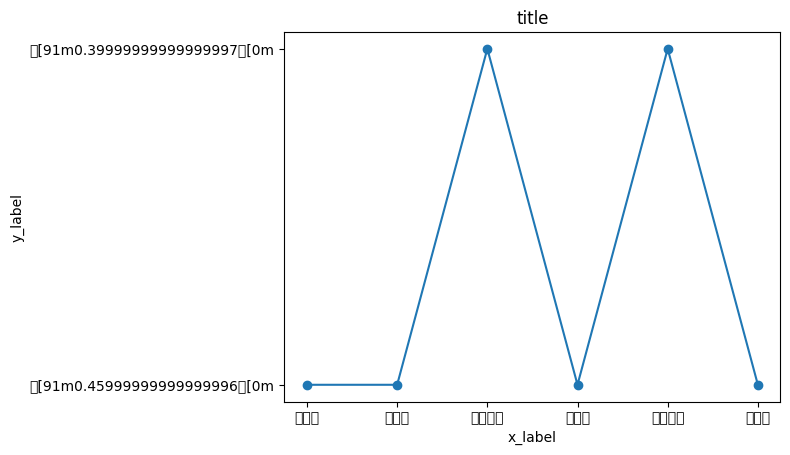

In [ ]:
plot_dictionary_data(distances_dict, "x_label", "y_label", "title")

Count of words found: 1
Count of words not found: 2


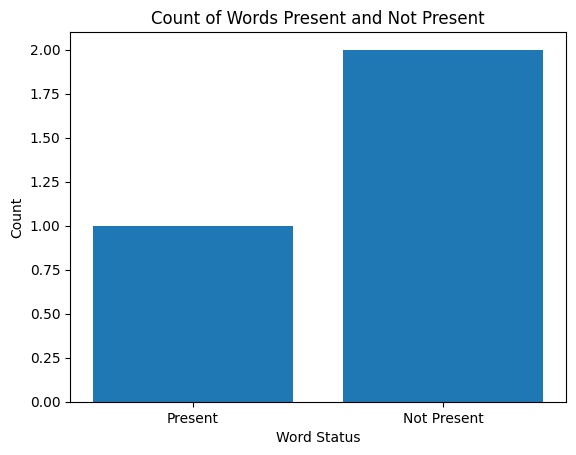

In [ ]:
# Plotting
labels = ['Present', 'Not Present']
values = [count_present, count_not_present]
# Print count of words found and not found
print(f"Count of words found: {count_present}")
print(f"Count of words not found: {count_not_present}")
fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_xlabel('Word Status')
ax.set_ylabel('Count')
ax.set_title('Count of Words Present and Not Present')
plt.show()